In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, plot_confusion_matrix
import xgboost as xgb



In [3]:
file_path = "/Users/JuanDiego/Documents/Proyectos Julio 2023/Customer-Churn-Data-Cleaned.csv"

df_initial_models = pd.read_csv(file_path)

In [4]:
df_initial_models.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Age Bracket
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0,"(40.2, 47.6]"
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0,"(40.2, 47.6]"
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0,"(40.2, 47.6]"
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0,"(32.8, 40.2]"
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0,"(40.2, 47.6]"


Logistic Regression Metrics with SMOTE and Hyperparameter Tuning:
Accuracy: 0.702
Precision: 0.37706342311033886
Recall: 0.7103109656301145
F1 Score: 0.492622020431328


/Users/JuanDiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


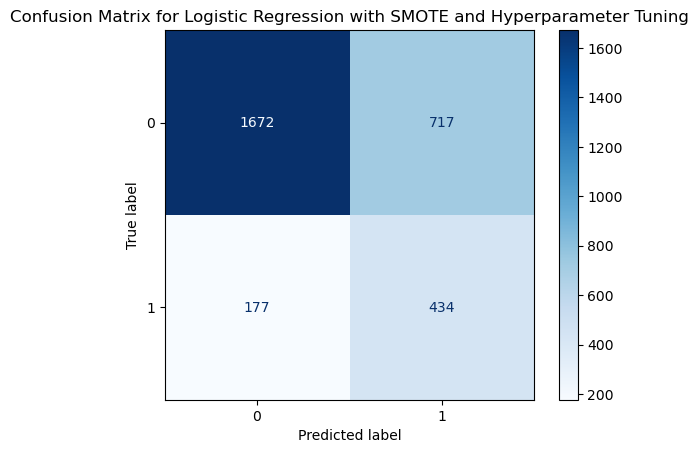

In [5]:
#### using smote and best hyper parametres of each one fiven last code: Logistic Regression:

#C: 10
#penalty: 'l1'
#solver: 'liblinear'
#Random Forest:

#max_depth: 10
#min_samples_leaf: 4
#min_samples_split: 2
#n_estimators: 50
#XGBoost:

#colsample_bytree: 1.0
#gamma: 0
#learning_rate: 0.1
#max_depth: 3
#n_estimators: 150
#subsample: 1.0

# Necessary Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix

# Data Preparation (Assuming df_initial_models is loaded and the necessary features are selected)
features = ['CreditScore', 'Age', 'IsActiveMember', 'Balance', 'NumOfProducts']
X = df_initial_models[features]
y = df_initial_models['Exited']

# Splitting the data (stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Training the Logistic Regression model
Logistic_regression_4 = LogisticRegression(C=10, penalty='l1', solver='liblinear', random_state=42)
Logistic_regression_4.fit(X_train_smote, y_train_smote)

# Making predictions on the test dataset
y_pred = Logistic_regression_4.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Metrics with SMOTE and Hyperparameter Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix Visualization
plot_confusion_matrix(Logistic_regression_4, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression with SMOTE and Hyperparameter Tuning")
plt.show()


Logistic Regression Metrics with SMOTE and Hyperparameter Tuning:
Accuracy: 0.702
Precision: 0.37706342311033886
Recall: 0.7103109656301145
F1 Score: 0.492622020431328


/Users/JuanDiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


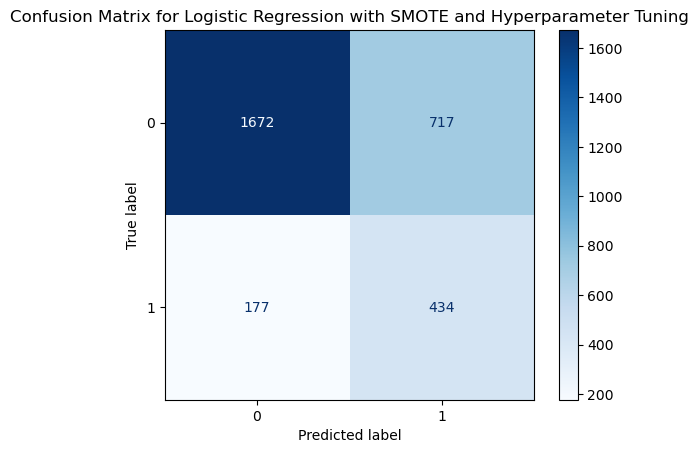

In [6]:
#### testing with no best parameters, does something change?

# Data Preparation (Assuming df_initial_models is loaded and the necessary features are selected)
features = ['CreditScore', 'Age', 'IsActiveMember', 'Balance', 'NumOfProducts']
X = df_initial_models[features]
y = df_initial_models['Exited']

# Splitting the data (stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Training the Logistic Regression model
Logistic_regression_4 = LogisticRegression(random_state=42)
Logistic_regression_4.fit(X_train_smote, y_train_smote)

# Making predictions on the test dataset
y_pred = Logistic_regression_4.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Metrics with SMOTE and Hyperparameter Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix Visualization
plot_confusion_matrix(Logistic_regression_4, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression with SMOTE and Hyperparameter Tuning")
plt.show()


Random Forest (Random_Forest_4) Metrics with Hyperparameter Tuning and SMOTE:
Accuracy: 0.819
Precision: 0.5426065162907269
Recall: 0.7086743044189853
F1 Score: 0.6146202980837474


/Users/JuanDiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


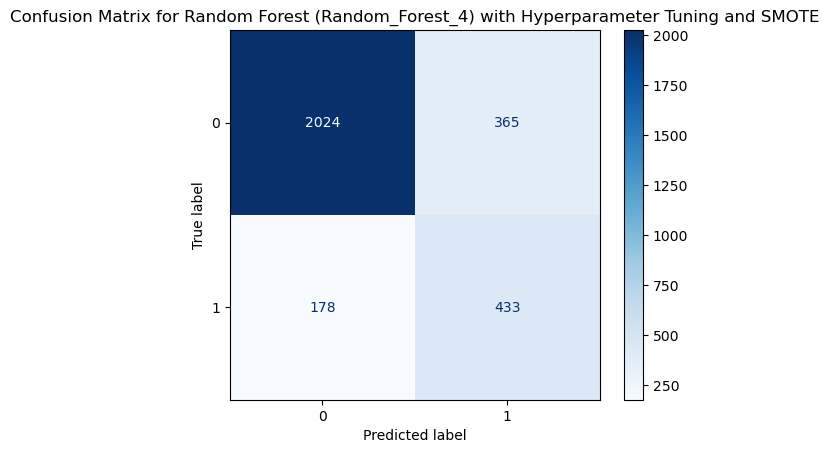

In [8]:
### nothing changed, lets continue onto next model:

## Random_Forest_4

# Necessary Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Data Preparation
features = ['CreditScore', 'Age', 'IsActiveMember', 'Balance', 'NumOfProducts']
X = df_initial_models[features]
y = df_initial_models['Exited']

# Splitting the data (stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Best hyperparameters for Random Forest
best_rf_params = {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}

# Training the Random Forest model with best hyperparameters
Random_Forest_4 = RandomForestClassifier(**best_rf_params, random_state=42)
Random_Forest_4.fit(X_train_smote, y_train_smote)

# Making predictions on the test dataset
y_pred_rf = Random_Forest_4.predict(X_test_scaled)

# Evaluation
print("Random Forest (Random_Forest_4) Metrics with Hyperparameter Tuning and SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Confusion Matrix Visualization
plot_confusion_matrix(Random_Forest_4, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix for Random Forest (Random_Forest_4) with Hyperparameter Tuning and SMOTE")
plt.show()


In [9]:
## The code I provided is a generic snippet to check the distribution of classes in the training set before and after applying SMOTE. It's not specific to any model. It's just a way to ensure that the SMOTE oversampling technique is indeed increasing the number of samples in the minority class.

from collections import Counter
from imblearn.over_sampling import SMOTE

# Assuming you already have your training set split:
# X_train, X_test, y_train, y_test = train_test_split(...)

# Check distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_smote))


Class distribution before SMOTE: Counter({0: 5573, 1: 1427})
Class distribution after SMOTE: Counter({0: 5573, 1: 5573})


/Users/JuanDiego/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost_4 Metrics with Hyperparameter Tuning and SMOTE:
Accuracy: 0.8226666666666667
Precision: 0.5513654096228868
Recall: 0.6939443535188216
F1 Score: 0.6144927536231884


/Users/JuanDiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


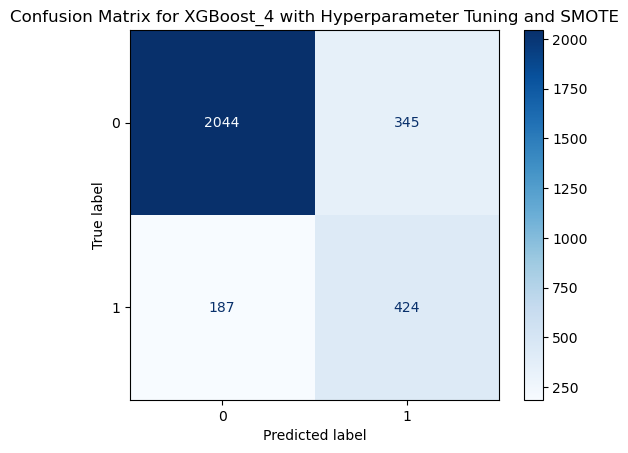

Best Hyperparameters for XGBoost_4: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 1.0}


In [11]:
#### and finally the last model XGBOOST with smote and best hyper tuning.

## Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Data Preparation (Assuming df_initial_models is loaded and the necessary features are selected)
features = ['CreditScore', 'Age', 'IsActiveMember', 'Balance', 'NumOfProducts']
X = df_initial_models[features]
y = df_initial_models['Exited']

# Splitting the data (stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Initializing the XGBoost classifier with best hyperparameters
XGBoost_4 = XGBClassifier(
    colsample_bytree=1.0,
    gamma=0,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=150,
    subsample=1.0,
    use_label_encoder=False, # To avoid warning about deprecation
    objective='binary:logistic',
    eval_metric='logloss' # Binary classification metric
)

# Fitting the model
XGBoost_4.fit(X_train_smote, y_train_smote)

# Making predictions on the test dataset
y_pred = XGBoost_4.predict(X_test_scaled)

# Evaluation
print("XGBoost_4 Metrics with Hyperparameter Tuning and SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix Visualization
plot_confusion_matrix(XGBoost_4, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix for XGBoost_4 with Hyperparameter Tuning and SMOTE")
plt.show()

# Extracting best hyperparameters (For demonstration purposes, as we already set them)
best_hyperparameters = {
    'colsample_bytree': 1.0,
    'gamma': 0,
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 150,
    'subsample': 1.0
}
print("Best Hyperparameters for XGBoost_4:", best_hyperparameters)


/Users/JuanDiego/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost_4 Metrics with SMOTE:
Accuracy: 0.8393333333333334
Precision: 0.6166365280289331
Recall: 0.55810147299509
F1 Score: 0.5859106529209622


/Users/JuanDiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


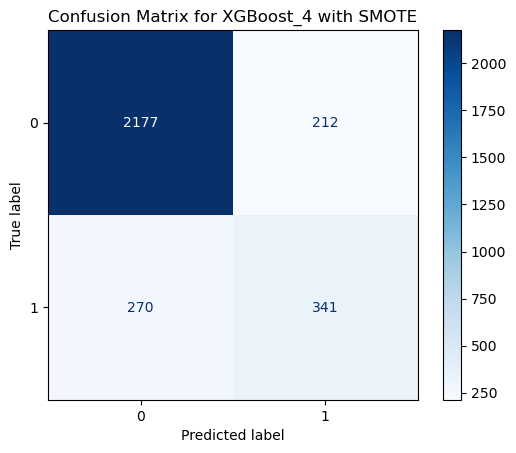

In [12]:
## Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Data Preparation (Assuming df_initial_models is loaded and the necessary features are selected)
features = ['CreditScore', 'Age', 'IsActiveMember', 'Balance', 'NumOfProducts']
X = df_initial_models[features]
y = df_initial_models['Exited']

# Splitting the data (stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Initializing the XGBoost classifier with default parameters
XGBoost_4 = XGBClassifier(
    use_label_encoder=False, # To avoid warning about deprecation
    objective='binary:logistic',
    eval_metric='logloss' # Binary classification metric
)

# Fitting the model
XGBoost_4.fit(X_train_smote, y_train_smote)

# Making predictions on the test dataset
y_pred = XGBoost_4.predict(X_test_scaled)

# Evaluation
print("XGBoost_4 Metrics with SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix Visualization
plot_confusion_matrix(XGBoost_4, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix for XGBoost_4 with SMOTE")
plt.show()


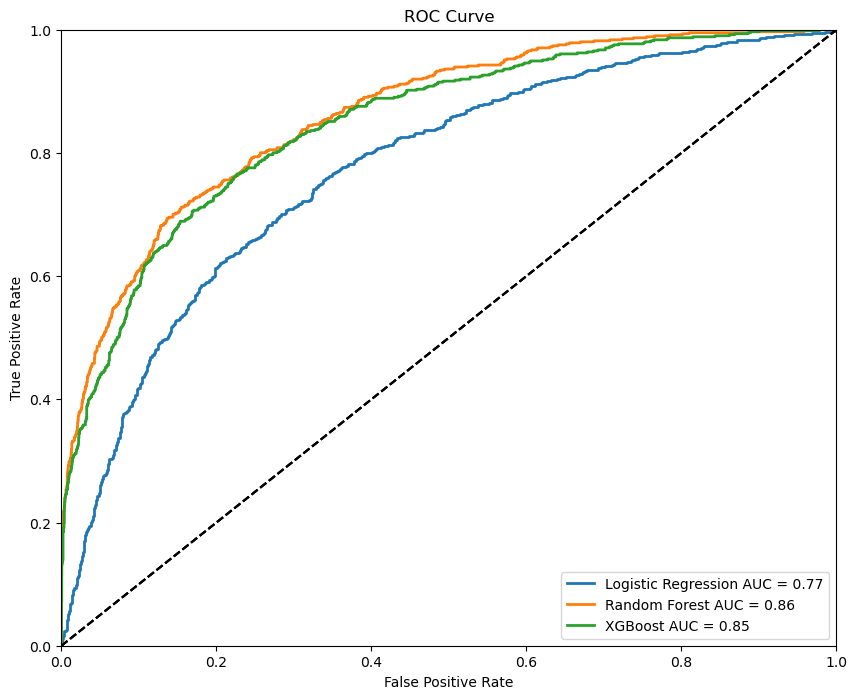

In [14]:
#### using ROC CURVE 

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define a function to plot the ROC curve
def plot_roc_curve(fpr, tpr, model_name=None):
    roc_auc = auc(fpr, tpr)
    label = f'{model_name} AUC = {roc_auc:.2f}'
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

# For Logistic_regression_4
y_scores_lr4 = Logistic_regression_4.decision_function(X_test_scaled)
fpr_lr4, tpr_lr4, thresholds_lr4 = roc_curve(y_test, y_scores_lr4)

# For Random_Forest_4
y_probas_rf4 = Random_Forest_4.predict_proba(X_test_scaled)
y_scores_rf4 = y_probas_rf4[:, 1] # score = probability of positive class
fpr_rf4, tpr_rf4, thresholds_rf4 = roc_curve(y_test, y_scores_rf4)

# For XGBoost_4
y_probas_xgb4 = XGBoost_4.predict_proba(X_test_scaled)
y_scores_xgb4 = y_probas_xgb4[:, 1]
fpr_xgb4, tpr_xgb4, thresholds_xgb4 = roc_curve(y_test, y_scores_xgb4)

# Plotting
plt.figure(figsize=(10, 8))
plot_roc_curve(fpr_lr4, tpr_lr4, "Logistic Regression")
plot_roc_curve(fpr_rf4, tpr_rf4, "Random Forest")
plot_roc_curve(fpr_xgb4, tpr_xgb4, "XGBoost")
plt.legend(loc="lower right")
plt.show()


In [15]:
pip install shap


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


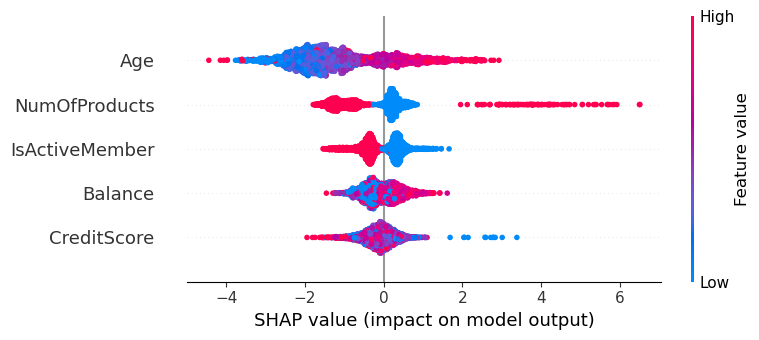

In [18]:
import shap

# Create the SHAP explainer using your XGBoost model
explainer = shap.TreeExplainer(XGBoost_4)

# Compute SHAP values for a subset of your test data
shap_values = explainer.shap_values(X_test_scaled)

# Summary Plot
# This provides a global overview of feature importance and impacts
shap.summary_plot(shap_values, X_test_scaled, feature_names=features)  # Ensure 'features' is a list of feature names you used for training

# Force Plot for a single instance (e.g., the first instance in your test set)
# This visualization helps understand the contribution of each feature for a particular prediction.
shap.initjs()  # Required for visual rendering in Jupyter
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_scaled[0,:], feature_names=features)



In [ ]:
### If red bars in the SHAP force plot are pulling to the left, it means that those feature values are pushing the prediction to be lower than the base value (or the average model output over the dataset). Conversely, blue bars pulling to the left indicate the opposite: those feature values are pushing the prediction to be higher than the base value.

#However, the interpretation of "left" and "right" depends on the context of your problem:

#Binary Classification: In the context of binary classification, where you might be predicting probabilities:
#If "1" (e.g., "exit" in your case) is considered the positive class, then red bars pulling to the left would indicate that those features are making it less likely for the instance to be classified as "1" or "exit". In contrast, blue bars pulling to the left would suggest those features are making it more likely for the instance to be classified as "1".

#If "0" is the positive class, the interpretation would be the opposite.

In [ ]:
# If red bars in the SHAP force plot are pulling to the left, it means that those feature values are pushing the prediction to be lower than the base value (or the average model output over the dataset). Conversely, blue bars pulling to the left indicate the opposite: those feature values are pushing the prediction to be higher than the base value.

#However, the interpretation of "left" and "right" depends on the context of your problem:

#Binary Classification: In the context of binary classification, where you might be predicting probabilities:
#If "1" (e.g., "exit" in your case) is considered the positive class, then red bars pulling to the left would indicate that those features are making it less likely for the instance to be classified as "1" or "exit". In contrast, blue bars pulling to the left would suggest those features are making it more likely for the instance to be classified as "1".

#If "0" is the positive class, the interpretation would be the opposite.



In [ ]:
# future research could be utilized for removing features making the minority class to vanish from the top prediction rate.
## shap use is recommended as a visual tool for interpretation
# model implmentation could remain the same, but further exploration is required
